<a href="https://colab.research.google.com/github/prakashzhaa/cs224n-NLP/blob/main/Hugging_face_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HUGGING FACE TUTORIALS

In [1]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [2]:
from collections import defaultdict, Counter
import json

from matplotlib import pyplot as plt
import numpy as np
import torch

def print_encoding(model_inputs, indent=4):
  indent_str= " " * indent
  print("{")
  for k,v in model_inputs.items():
    print(indent_str + k + ":")
    print(indent_str + indent_str + str(v))
    print("}")


### **Sentiment Analysis Model**

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#initilize the token
tokenizer= AutoTokenizer.from_pretrained("siebert/sentiment-roberta-large-english")
#model initialization
model= AutoModelForSequenceClassification.from_pretrained("siebert/sentiment-roberta-large-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

In [4]:
inputs="I am trying soo much to be sucessfull in life!"
tokenized_inputs= tokenizer(inputs, return_tensors="pt")
outputs= model(**tokenized_inputs)

labels=['NEGATIVE','POSITIVE']
prediction = torch.argmax(outputs.logits)

print("Input:")
print(inputs)
print()
print("Tokenized Inputs:")
print_encoding(tokenized_inputs)
print()
print("Model Outputs: ")
print(outputs)
print()
print(f"The prediction is {labels[prediction]}")




Input:
I am trying soo much to be sucessfull in life!

Tokenized Inputs:
{
    input_ids:
        tensor([[    0,   100,   524,   667,    98,   139,   203,     7,    28,  2628,
         19348, 16320,    11,   301,   328,     2]])
}
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
}

Model Outputs: 
SequenceClassifierOutput(loss=None, logits=tensor([[-3.0958,  2.3424]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

The prediction is POSITIVE


### **Tokenizers**

In [5]:
from transformers import DistilBertTokenizer, DistilBertTokenizerFast, AutoTokenizer

# Load tokenizer implemented in Python
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")
print(tokenizer)

# Load tokenizer implemented in Rust
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-cased")
print(tokenizer)

# Load tokenizer using AutoTokenizer with fast implementation preferred
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
print(tokenizer)


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

DistilBertTokenizer(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
DistilBertTokenizerFast(name_or_path='distilbert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padd

In [6]:
input_str="Hello Hugging Face I Would love to research around you!"
tokenized_inputs = tokenizer(input_str)

print("Vanilla Tokenization")
print_encoding(tokenized_inputs)
print()

#ways to access
print(tokenized_inputs.input_ids)
print(tokenized_inputs["input_ids"])

Vanilla Tokenization
{
    input_ids:
        [101, 8667, 20164, 10932, 10289, 146, 5718, 1567, 1106, 1844, 1213, 1128, 106, 102]
}
    attention_mask:
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

[101, 8667, 20164, 10932, 10289, 146, 5718, 1567, 1106, 1844, 1213, 1128, 106, 102]
[101, 8667, 20164, 10932, 10289, 146, 5718, 1567, 1106, 1844, 1213, 1128, 106, 102]


In [7]:
cls = [tokenizer.cls_token_id]
sep = [tokenizer.sep_token_id]

input_tokens = tokenizer.tokenize(input_str)
input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
input_ids_special_tokens = cls + input_ids + sep

decoded_str = tokenizer.decode(input_ids_special_tokens)

print("start:                 ", input_str)
print("tokenize:              ", input_tokens)
print("convert_tokens_to_ids: ", input_ids_special_tokens)
print("-----------------")
print("decode                 ", decoded_str)

#these steps don't create attention mask or add the special characters

start:                  Hello Hugging Face I Would love to research around you!
tokenize:               ['Hello', 'Hu', '##gging', 'Face', 'I', 'Would', 'love', 'to', 'research', 'around', 'you', '!']
convert_tokens_to_ids:  [101, 8667, 20164, 10932, 10289, 146, 5718, 1567, 1106, 1844, 1213, 1128, 106, 102]
-----------------
decode                  [CLS] Hello Hugging Face I Would love to research around you! [SEP]


In [8]:
#for Fast Tokenizer, there's another option too
inputs = tokenizer._tokenizer.encode(input_str)

print(input_str)
print("-"*5)

print(f"Number of tokens: {len(inputs)}")
print(f"Ids : {inputs.ids}")
print(f"Tokens: {inputs.tokens}")
print(f"Special tokens mask: {inputs.special_tokens_mask}")
print()
print("char_to_word gives the wordpiece of a character in the input")
char_idx = 8
print(f"For example, the {char_idx + 1}th character of the string is '{input_str[char_idx]}',"+\
      f" and it's part of wordpiece {inputs.char_to_token(char_idx)}, '{inputs.tokens[inputs.char_to_token(char_idx)]}' ")

Hello Hugging Face I Would love to research around you!
-----
Number of tokens: 14
Ids : [101, 8667, 20164, 10932, 10289, 146, 5718, 1567, 1106, 1844, 1213, 1128, 106, 102]
Tokens: ['[CLS]', 'Hello', 'Hu', '##gging', 'Face', 'I', 'Would', 'love', 'to', 'research', 'around', 'you', '!', '[SEP]']
Special tokens mask: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

char_to_word gives the wordpiece of a character in the input
For example, the 9th character of the string is 'g', and it's part of wordpiece 3, '##gging' 


In [9]:
#Other cool tricks:
#the tokenizer can return pytorch tensors

model_inputs = tokenizer("Hugging face transformers is great!, I'd really loved each one!")
print("Pytorch Tensors")
print_encoding(model_inputs)


Pytorch Tensors
{
    input_ids:
        [101, 20164, 10932, 1339, 11303, 1468, 1110, 1632, 106, 117, 146, 112, 173, 1541, 3097, 1296, 1141, 106, 102]
}
    attention_mask:
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}


In [10]:
#pass multiple strings
model_inputs=tokenizer(["Hugging face transformers is great!",
                        "The quick brown fox jumps over the lazy dog." +\
                        "then the dog got up and ran away beacuse she din't like foxes!",
                        ],
                       return_tensors="pt",
                       padding=True,
                       truncation=True)
print(f"Pad token: {tokenizer.pad_token} | Pad token id: {tokenizer.pad_token_id}")
print("Padding:")
print_encoding(model_inputs)


Pad token: [PAD] | Pad token id: 0
Padding:
{
    input_ids:
        tensor([[  101, 20164, 10932,  1339, 11303,  1468,  1110,  1632,   106,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0],
        [  101,  1109,  3613,  3058, 17594, 15457,  1166,  1103, 16688,  3676,
           119,  1173,  1103,  3676,  1400,  1146,  1105,  1868,  1283,  1129,
          7409,  5613,  1131, 28028,   112,   189,  1176, 17594,  1279,   106,
           102]])
}
    attention_mask:
        tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])
}


In [11]:
print("Batch Decode:")
print(tokenizer.batch_decode(model_inputs.input_ids))
print()
print("Batch Decode: (no special characters)")
print(tokenizer.batch_decode(model_inputs.input_ids, skip_special_tokens=True))

Batch Decode:
['[CLS] Hugging face transformers is great! [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]', "[CLS] The quick brown fox jumps over the lazy dog. then the dog got up and ran away beacuse she din't like foxes! [SEP]"]

Batch Decode: (no special characters)
['Hugging face transformers is great!', "The quick brown fox jumps over the lazy dog. then the dog got up and ran away beacuse she din't like foxes!"]


##  Models
Initializing models is very similar to initializing tokenizers. You can either use the model class specific to your model or you can use an
AutoModel class. I tend to prefer AutoModel, especially when I want to compare models, because it's easy to specify the models as strings.

While most of the pretrained transformers have similar architecture, if you there are additional weights, called "heads" that you have to train if
you're doing sequence classification, question answering, or some other task. Hugging Face automatically sets up the architecture you need
when you specify the model class. For example, we are doing sentiment analysis, so we are going to use
`DistilBertForsequenceC1assification`. If we were going to continue training DistilBERT on its masked-language modeling training
objective, we would use `DistilBertForMaskedLM`, and if we just wanted the model's representations, maybe for our own downstream task, we
could just use `DistilBertMode1`.

Here's a stylized picture of a model recreated from one found here: [https://huggingface.co/learn/nlp-course/en/chapter2/3?fw=pt ](https://huggingface.co/learn/nlp-course/en/chapter2/3?fw=pt)

`ForMaskedLM`

`ForSequenceClassification`

`ForTokenClassification`

`ForQuestionAnswering`

`ForMultipleChoice`


In [12]:
#import distillBERT for sequence classification
from transformers import AutoModelForSequenceClassification, DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-cased', num_labels=2)     #num_lables= binary classification task (two labels).

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
model_inputs= tokenizer(input_str, return_tensors="pt")
#option 1
model_outputs = model(input_ids=model_inputs.input_ids, attention_mask= model_inputs.attention_mask)
print(model_outputs)

#option 2
model_outputs= model(**model_inputs)

print(model_outputs)
print()
print(model_outputs)
print()
print(f"Distribution over labels: {torch.softmax(model_outputs.logits, dim=1)}")

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2283,  0.0228]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
SequenceClassifierOutput(loss=None, logits=tensor([[-0.2283,  0.0228]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.2283,  0.0228]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

Distribution over labels: tensor([[0.4375, 0.5625]], grad_fn=<SoftmaxBackward0>)


In [14]:
#calculate the loss
label = torch.tensor([1])
loss = torch.nn.functional.cross_entropy(model_outputs.logits, label)
print(loss)
loss.backward()


tensor(0.5754, grad_fn=<NllLossBackward0>)


In [15]:
list(model.named_parameters())

[('distilbert.embeddings.word_embeddings.weight',
  Parameter containing:
  tensor([[-2.5130e-02, -3.3044e-02, -2.4396e-03,  ..., -1.0848e-02,
           -4.6824e-02, -9.4855e-03],
          [-4.8244e-03, -2.1486e-02, -8.7145e-03,  ..., -2.6029e-02,
           -3.7862e-02, -2.4103e-02],
          [-1.6531e-02, -1.7862e-02,  1.0596e-03,  ..., -1.6371e-02,
           -3.5670e-02, -3.1419e-02],
          ...,
          [-9.6466e-03,  1.4814e-02, -2.9182e-02,  ..., -3.7873e-02,
           -4.6263e-02, -1.6803e-02],
          [-1.3170e-02,  6.5378e-05, -3.7222e-02,  ..., -4.3558e-02,
           -1.1252e-02, -2.2152e-02],
          [ 1.1905e-02, -2.3293e-02, -2.2506e-02,  ..., -2.7136e-02,
           -4.3556e-02,  1.0529e-04]], requires_grad=True)),
 ('distilbert.embeddings.position_embeddings.weight',
  Parameter containing:
  tensor([[ 0.0234,  0.0052, -0.0135,  ...,  0.0015,  0.0140,  0.0098],
          [-0.0269, -0.0048, -0.0055,  ...,  0.0059,  0.0046, -0.0055],
          [-0.0139, -0.0

In [18]:
#another way to calculate loss
model_inputs = tokenizer(input_str, return_tensors="pt")

labels = ['NEGATIVE','POSITIVE']
model_inputs['labels'] = torch.tensor([1])

model_outputs= model(**model_inputs)

print(model_outputs)
print(f"Model Prediction: {labels[model_outputs.logits.argmax()]}")



SequenceClassifierOutput(loss=tensor(0.5754, grad_fn=<NllLossBackward0>), logits=tensor([[-0.2283,  0.0228]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
Model Prediction: POSITIVE


In [25]:
from transformers import AutoModel

model = AutoModel.from_pretrained('distilbert-base-cased', output_attentions=True, output_hidden_states=True)

model.eval()

model_inputs = tokenizer(input_str, return_tensors="pt")
with torch.no_grad():
  model_output = model(**model_inputs)

print("Hidden States size per layer: ", model_output.hidden_states[0].shape)
print("Attention head size per layer : ", model_output.attentions[0].shape)

print(model_output)

Hidden States size per layer:  torch.Size([1, 14, 768])
Attention head size per layer :  torch.Size([1, 12, 14, 14])
BaseModelOutput(last_hidden_state=tensor([[[ 0.3002,  0.1020,  0.0067,  ..., -0.0360,  0.2807,  0.0656],
         [ 0.0206,  0.0889,  0.2290,  ...,  0.1570,  0.6539,  0.0067],
         [ 0.1811,  0.0043,  0.1467,  ...,  0.0782, -0.0616, -0.0588],
         ...,
         [ 0.3730,  0.1316,  0.0686,  ..., -0.0137,  0.3536,  0.4721],
         [ 0.1724,  0.3490,  0.2668,  ...,  0.4064,  0.1237,  0.1827],
         [ 0.5312,  0.3495, -0.1367,  ...,  0.0125,  0.6476,  0.1108]]]), hidden_states=(tensor([[[ 0.5521,  0.1778, -0.0585,  ..., -0.0160,  0.2085, -0.1154],
         [-0.9286,  0.0904,  0.6778,  ...,  0.3113, -0.1275,  0.3607],
         [ 0.0373, -1.0063, -1.1084,  ...,  1.2188,  0.0177, -0.5439],
         ...,
         [ 1.0013, -1.1440,  0.5851,  ...,  1.1031,  0.6786,  0.4380],
         [-0.6584,  1.0339,  1.0016,  ...,  0.7823, -1.0915, -0.0714],
         [-0.3997, -0.

['[CLS]', 'Hello', 'Hu', '##gging', 'Face', 'I', 'Would', 'love', 'to', 'research', 'around', 'you', '!', '[SEP]']


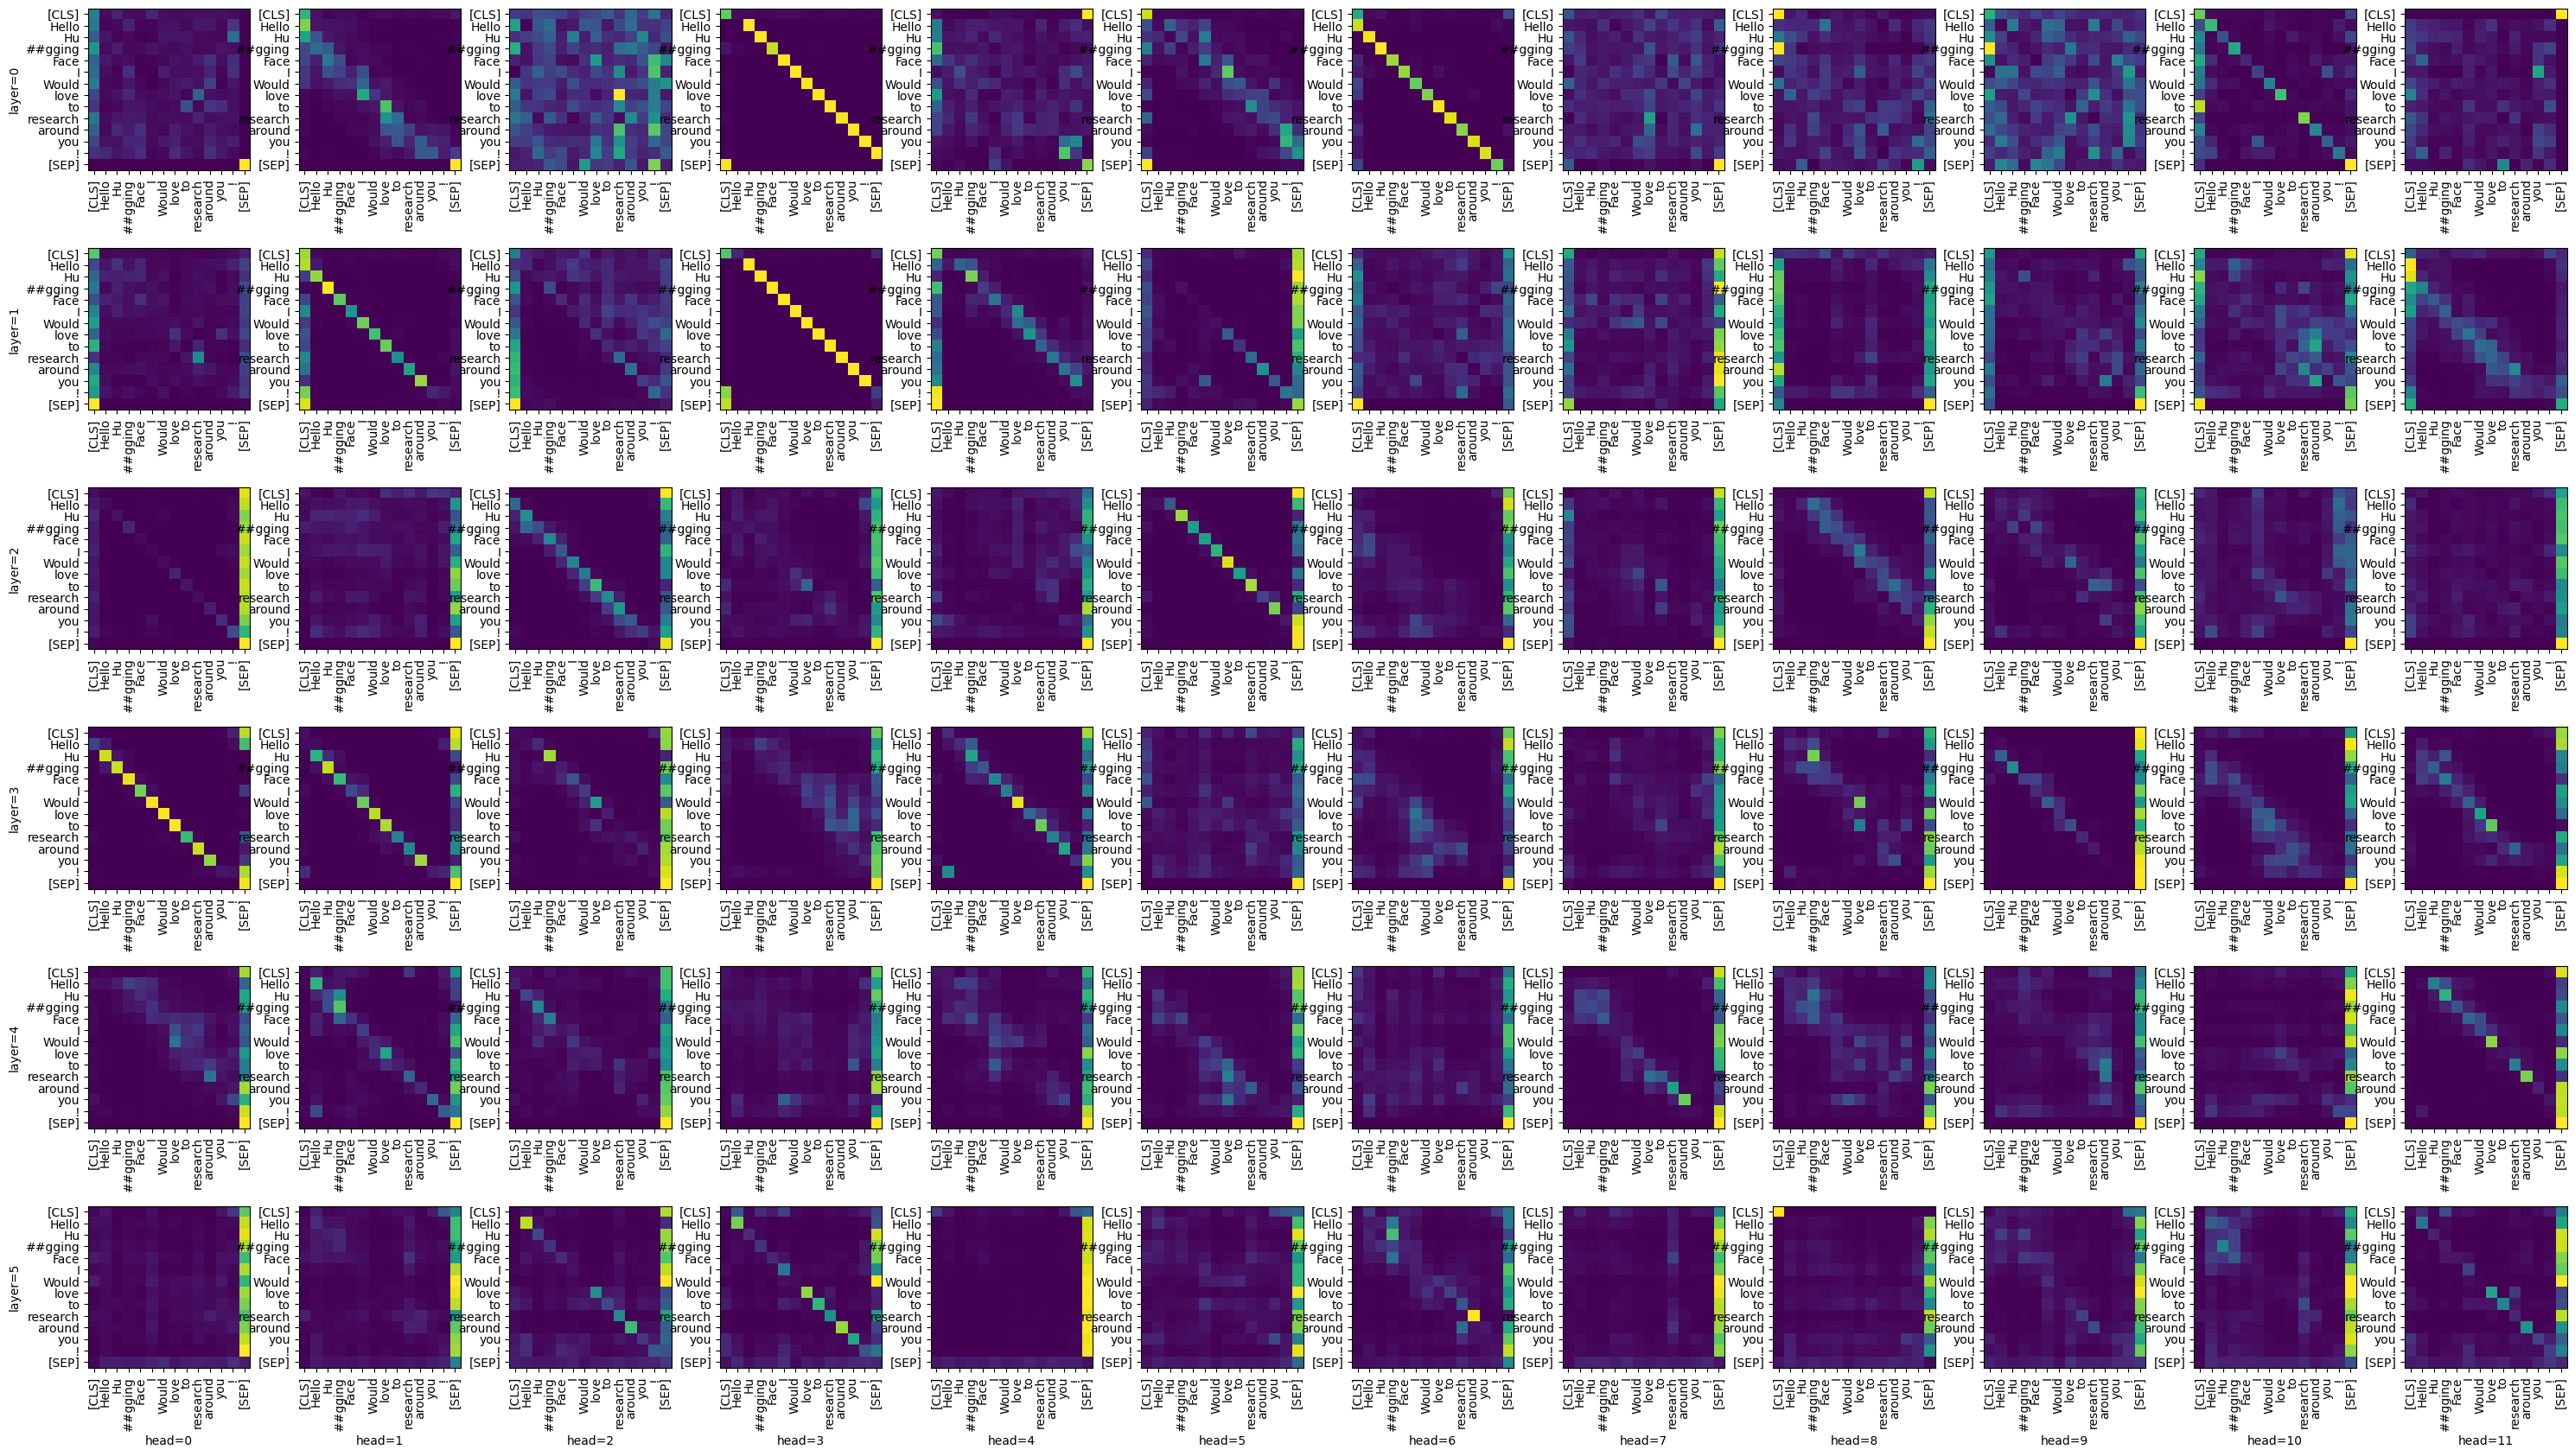

In [31]:
tokens = tokenizer.convert_ids_to_tokens(model_inputs.input_ids[0])
print(tokens)

n_layers = len(model_output.attentions)
n_heads = len(model_output.attentions[0][0])

# plot tokens
fig, axes = plt.subplots(n_layers, n_heads, figsize=(18.5*2, 10.5*2))
for layer in range(n_layers):
    for i in range(n_heads):
        axes[layer, i].imshow(model_output.attentions[layer][0, i])
        axes[layer, i].set_xticks(list(range(len(tokens))))
        axes[layer, i].set_xticklabels(tokens, rotation="vertical")
        axes[layer, i].set_yticks(list(range(len(tokens))))
        axes[layer, i].set_yticklabels(tokens)

        if layer == n_layers - 1:
            axes[layer, i].set_xlabel(f"head={i}")
        if i == 0:
            axes[layer, i].set_ylabel(f"layer={layer}")

plt.subplots_adjust(wspace=0.3)
plt.show()